<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_8/No_supervisado_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos No Supervisados

**Objetivo:** Introducir los conceptos fundamentales y la aplicación práctica de algoritmos de aprendizaje no supervisado utilizando Python y bibliotecas populares como Scikit-learn, Pandas y NumPy.

**Temas Cubiertos:**
1.  Clustering (Agrupamiento)
    *   K-Means
    *   Aglomerativo Jerárquico
    *   DBSCAN
2.  Reducción de la Dimensionalidad
    *   Análisis de Componentes Principales (PCA)
    *   t-SNE (para visualización)
3.  Ejercicio Práctico: Clustering aplicado a Acciones Globales

## 0. Configuración Inicial

Primero, importaremos las bibliotecas necesarias para nuestro análisis.
*   **Pandas:** Para manipulación y análisis de datos (especialmente DataFrames).
*   **NumPy:** Para operaciones numéricas eficientes, especialmente con arrays.
*   **Scikit-learn:** La biblioteca principal para machine learning en Python, que usaremos para clustering y reducción de dimensionalidad.
*   **Matplotlib & Seaborn:** Para visualización de datos.
*   **SciPy:** La usaremos específicamente para el dendrograma en clustering jerárquico.

In [ ]:
# Importación de librerías
import pandas as pd
import numpy as np

# Para Clustering y Reducción de Dimensionalidad
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Para escalar datos numéricos y codificar categóricos si fuera necesario
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # Para evaluar clusters

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para clustering jerárquico y dendrogramas
from scipy.cluster.hierarchy import dendrogram, linkage

# Configuraciones adicionales para visualización
%matplotlib inline
sns.set(style="whitegrid")

## 1. Clustering (Agrupamiento)

El clustering es una técnica de aprendizaje no supervisado cuyo objetivo es encontrar grupos (clusters) naturales en los datos, de modo que los puntos dentro de un mismo grupo sean más similares entre sí que con los puntos de otros grupos. No tenemos etiquetas predefinidas; el algoritmo las descubre.

### 1.1. K-Means (No Jerárquico)

**Concepto:**
K-Means es uno de los algoritmos de clustering más simples y populares. Funciona de la siguiente manera:
1.  **Elige K:** Se especifica el número de clusters (K) que se desean encontrar.
2.  **Inicialización:** Se seleccionan K puntos aleatorios como centroides iniciales de los clusters.
3.  **Asignación:** Cada punto de datos se asigna al cluster cuyo centroide esté más cercano (generalmente usando la distancia euclidiana).
4.  **Actualización:** Se recalculan los centroides de cada cluster como la media de todos los puntos asignados a ese cluster.
5.  **Iteración:** Los pasos 3 y 4 se repiten hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.

**Evaluación (Método del Codo - Elbow Method):**
Dado que debemos elegir K, el método del codo nos ayuda a encontrar un valor razonable. Calculamos la "inercia" (suma de las distancias al cuadrado de cada punto a su centroide más cercano) para diferentes valores de K. Graficamos K vs. Inercia. El "codo" de la gráfica (donde la tasa de disminución de la inercia se ralentiza) sugiere un buen valor para K.

**Ventajas:**
*   Simple y computacionalmente eficiente para grandes datasets.
*   Fácil de implementar e interpretar.

**Desventajas:**
*   Requiere especificar el número de clusters (K) de antemano.
*   Sensible a la inicialización aleatoria de los centroides (se suele ejecutar varias veces con diferentes inicios).
*   Asume que los clusters son esféricos y de tamaño similar.
*   Sensible a outliers y a la escala de las características (¡importante escalar los datos!).

/tmp/ipython-input-3030922324.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, cmap='viridis')


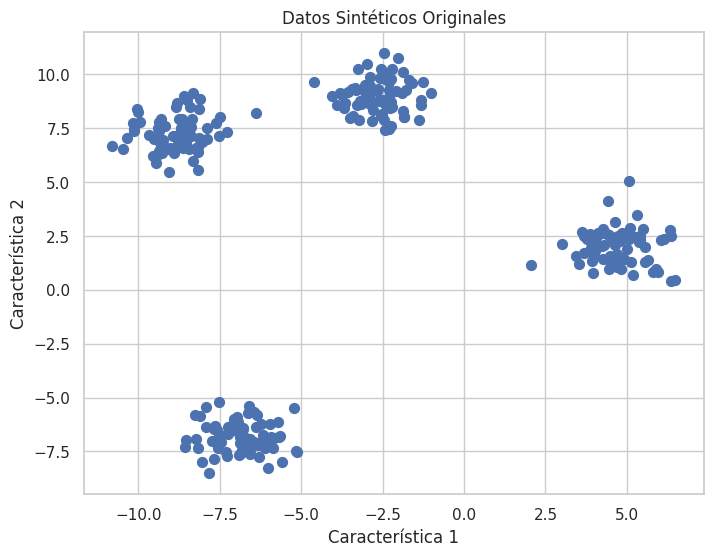

In [ ]:
# Ejemplo Ilustrativo de K-Means
from sklearn.datasets import make_blobs

# Generar datos sintéticos para clustering
X_blobs, y_blobs_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# Graficar los datos originales
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, cmap='viridis')
plt.title("Datos Sintéticos Originales")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [ ]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # n_init='auto' en versiones más nuevas
kmeans.fit(X_blobs)
y_kmeans = kmeans.predict(X_blobs)
centers = kmeans.cluster_centers_

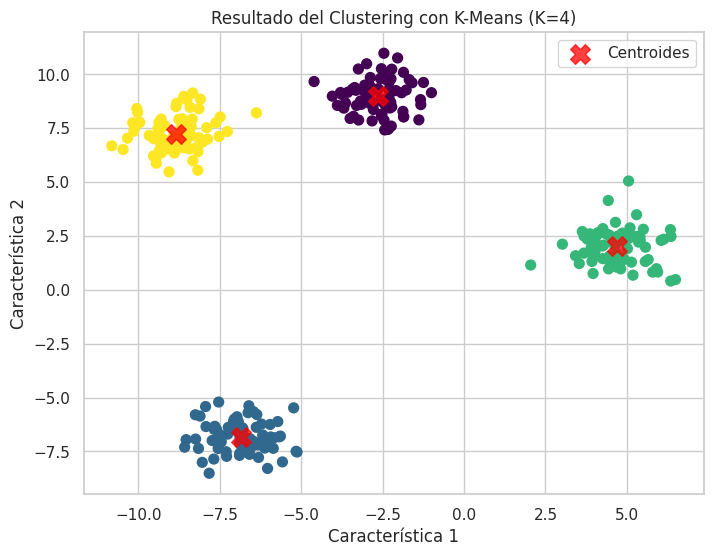

In [ ]:
# Graficar los resultados de K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title("Resultado del Clustering con K-Means (K=4)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.show()

In [ ]:
# Método del Codo para estimar K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(X_blobs)
    inertia.append(kmeans_elbow.inertia_)

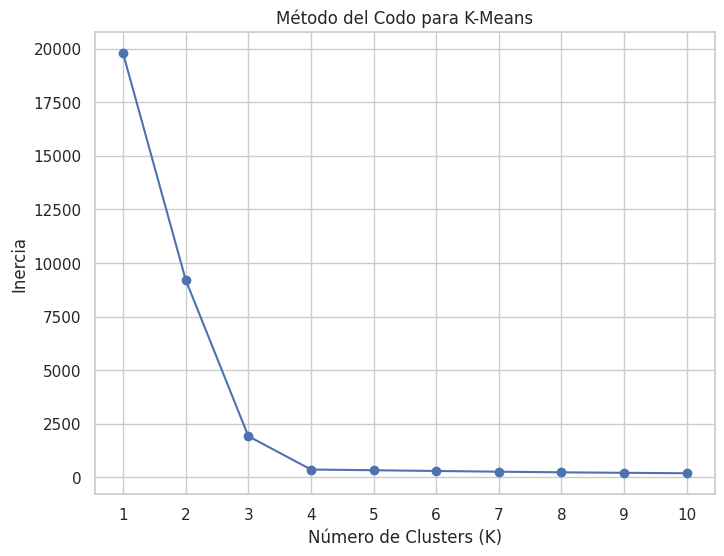

El 'codo' en la gráfica sugiere un buen valor de K (en este caso, K=4 es evidente).


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("El 'codo' en la gráfica sugiere un buen valor de K (en este caso, K=4 es evidente).")

### 1.2. Clustering Jerárquico (Aglomerativo)

**Concepto:**
El clustering aglomerativo es un enfoque jerárquico "bottom-up".
1.  **Inicio:** Cada punto de datos comienza en su propio cluster.
2.  **Fusión:** En cada paso, los dos clusters más cercanos se fusionan en uno solo. La "cercanía" se define mediante un criterio de enlace (linkage):
    *   **Ward:** Minimiza la varianza dentro de cada cluster (tiende a crear clusters de tamaño similar).
    *   **Complete (Máximo):** La distancia entre clusters es la distancia máxima entre sus puntos.
    *   **Average:** La distancia entre clusters es la distancia promedio entre todos los pares de puntos (uno de cada cluster).
    *   **Single (Mínimo):** La distancia entre clusters es la distancia mínima entre sus puntos (sensible a outliers).
3.  **Fin:** El proceso continúa hasta que todos los puntos están en un solo cluster.

**Dendrograma:**
El resultado se visualiza comúnmente como un dendrograma, un diagrama de árbol que muestra la secuencia de fusiones. La altura de cada fusión representa la distancia a la que se fusionaron los clusters. Cortar el dendrograma a una cierta altura define un número específico de clusters.

**Ventajas:**
*   No requiere especificar el número de clusters de antemano (se puede decidir viendo el dendrograma).
*   Produce una jerarquía de clusters, útil para entender la estructura de los datos.
*   El dendrograma es una visualización informativa.

**Desventajas:**
*   Computacionalmente caro, especialmente para datasets grandes (O(n^2) o O(n^3) dependiendo de la implementación).
*   Las decisiones de fusión son finales (no se pueden deshacer).
*   Sensible a la elección del criterio de enlace y la métrica de distancia.

In [ ]:
# Ejemplo Ilustrativo de Clustering Jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

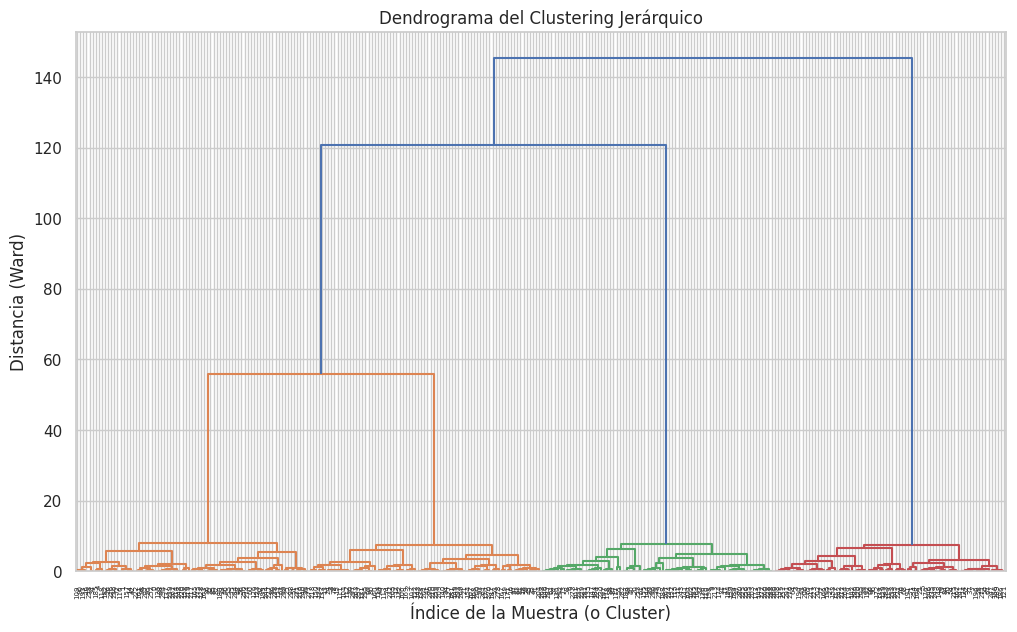

El dendrograma muestra cómo se fusionan los clusters. Cortar en diferentes alturas da diferentes números de clusters.


In [ ]:
# Usaremos los mismos datos sintéticos X_blobs

# Calcular la matriz de enlace usando el método 'ward'
linked = linkage(X_blobs, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(12, 7))
dendrogram(linked,
            orientation='top',
            # labels= # Podrías poner etiquetas aquí si tuvieras pocas muestras
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de la Muestra (o Cluster)')
plt.ylabel('Distancia (Ward)')
plt.show()

print("El dendrograma muestra cómo se fusionan los clusters. Cortar en diferentes alturas da diferentes números de clusters.")

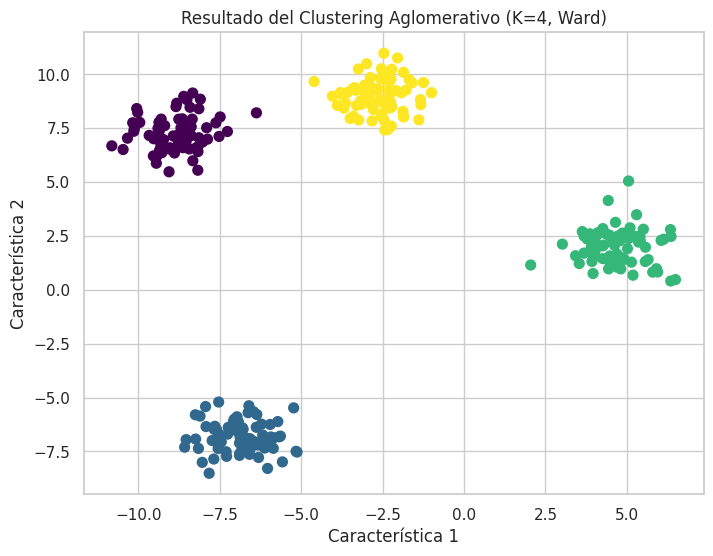

In [ ]:
# Aplicar AgglomerativeClustering especificando el número de clusters
# (Puedes elegir n_clusters basado en el dendrograma, por ejemplo, cortando donde hay mayor distancia vertical sin cruzar líneas)
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg = agg_clustering.fit_predict(X_blobs)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title("Resultado del Clustering Aglomerativo (K=4, Ward)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

### 1.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Concepto:**
DBSCAN agrupa puntos que están densamente empaquetados, marcando como ruido los puntos que se encuentran solos en regiones de baja densidad. Se basa en dos parámetros:
1.  **`eps` (epsilon):** La distancia máxima entre dos muestras para que una se considere vecina de la otra.
2.  **`min_samples`:** El número de muestras (o peso total) en una vecindad para que un punto sea considerado como un punto *núcleo* (core point).

El algoritmo funciona así:
1.  Se elige un punto arbitrario no visitado.
2.  Si el punto es un *punto núcleo* (tiene al menos `min_samples` vecinos dentro de la distancia `eps`), se inicia un nuevo cluster. Todos los puntos densamente alcanzables desde este punto se añaden al cluster.
3.  Si el punto no es núcleo, se marca temporalmente como ruido (podría ser añadido a un cluster más tarde si es alcanzado por otro punto núcleo).
4.  Se repite el proceso hasta que todos los puntos han sido visitados.

**Ventajas:**
*   No requiere especificar el número de clusters.
*   Puede encontrar clusters de formas arbitrarias.
*   Robusto frente a outliers (los identifica como ruido).

**Desventajas:**
*   No funciona bien con clusters de densidades variables.
*   Sensible a los parámetros `eps` y `min_samples`. Encontrar buenos valores puede ser difícil.
*   Puede tener problemas con datos de muy alta dimensionalidad (la "maldición de la dimensionalidad").

In [ ]:
# Ejemplo Ilustrativo de DBSCAN
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [ ]:
# Generar datos con forma no esférica (lunas)
X_moons, y_moons_true = make_moons(n_samples=250, noise=0.1, random_state=42)

# Escalar los datos (aunque DBSCAN es menos sensible a la escala que K-Means, sigue siendo buena práctica)
scaler_moons = StandardScaler()
X_moons_scaled = scaler_moons.fit_transform(X_moons)

In [ ]:
# Aplicar DBSCAN
# Encontrar buenos eps y min_samples puede requerir experimentación
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons_scaled)

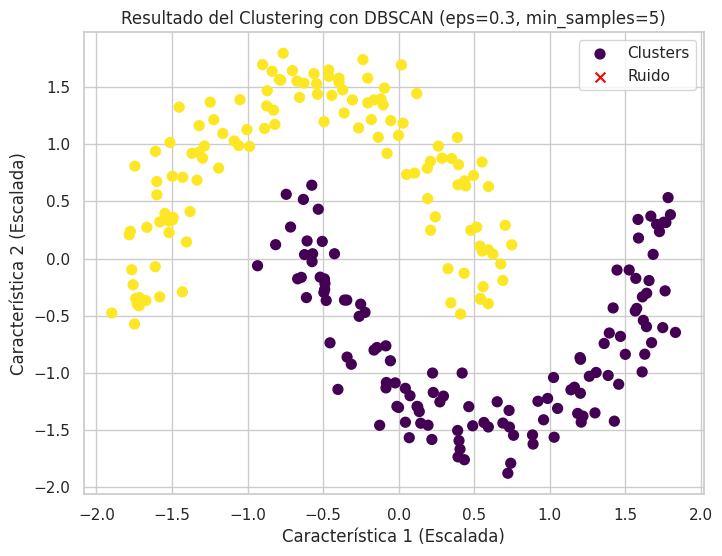

Número de clusters encontrados: 2
Número de puntos de ruido encontrados: 0


In [ ]:
# Graficar los resultados
plt.figure(figsize=(8, 6))

# Los puntos marcados como -1 son ruido
noise_mask = y_dbscan == -1
clusters_mask = y_dbscan != -1

plt.scatter(X_moons_scaled[clusters_mask, 0], X_moons_scaled[clusters_mask, 1], c=y_dbscan[clusters_mask], s=50, cmap='viridis', label='Clusters')
plt.scatter(X_moons_scaled[noise_mask, 0], X_moons_scaled[noise_mask, 1], c='red', s=50, marker='x', label='Ruido')

plt.title(f"Resultado del Clustering con DBSCAN (eps=0.3, min_samples=5)")
plt.xlabel("Característica 1 (Escalada)")
plt.ylabel("Característica 2 (Escalada)")
plt.legend()
plt.show()

print(f"Número de clusters encontrados: {len(set(y_dbscan[y_dbscan != -1]))}")
print(f"Número de puntos de ruido encontrados: {np.sum(y_dbscan == -1)}")

## 2. Reducción de la Dimensionalidad

Cuando trabajamos con datasets que tienen muchas características (alta dimensionalidad), podemos enfrentar problemas como la "maldición de la dimensionalidad", mayor coste computacional y dificultad para visualizar. La reducción de dimensionalidad busca reducir el número de características manteniendo la mayor cantidad de información relevante posible.

---

### 2.1. Análisis de Componentes Principales (PCA)

**Concepto:**
PCA es una técnica lineal que transforma los datos a un nuevo sistema de coordenadas donde las nuevas características (componentes principales) capturan la máxima varianza posible de los datos y no están correlacionadas entre sí.
1.  Estandariza los datos (media 0, varianza 1).
2.  Calcula la matriz de covarianza.
3.  Calcula los eigenvectores y eigenvalores de la matriz de covarianza.
4.  Los eigenvectores (ordenados por sus eigenvalores correspondientes de mayor a menor) definen las direcciones de los nuevos ejes (componentes principales). El eigenvalor indica la cantidad de varianza explicada por ese componente.
5.  Se proyectan los datos originales sobre los primeros `k` componentes principales para reducir la dimensionalidad a `k`.

**¿Cuántos componentes elegir?** Se suele mirar la "varianza explicada acumulada". Por ejemplo, elegir suficientes componentes para explicar el 90% o 95% de la varianza total.

**Ventajas:**
*   Efectivo para reducir dimensiones eliminando redundancia (correlación).
*   No requiere parámetros complejos (solo el número de componentes deseado).
*   Útil para visualización (reduciendo a 2 o 3D) y como preprocesamiento para otros algoritmos.

**Desventajas:**
*   Asume linealidad en las relaciones entre características.
*   Los componentes principales resultantes pueden no ser fácilmente interpretables en términos de las características originales.
*   Sensible a la escala de los datos (¡importante escalar!).

In [ ]:
# Ejemplo Ilustrativo de PCA
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names

# Escalar los datos
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)


In [ ]:
# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris_scaled)

In [ ]:
# Varianza explicada por cada componente
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")
print(f"Varianza explicada acumulada: {np.sum(pca.explained_variance_ratio_)}")

Varianza explicada por componente: [0.72962445 0.22850762]
Varianza explicada acumulada: 0.9581320720000166


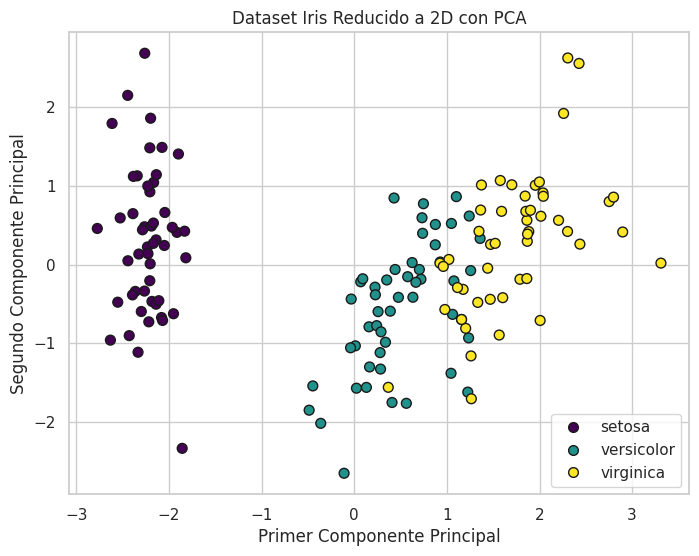

In [ ]:
# Graficar los datos reducidos a 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k', s=50)
plt.title('Dataset Iris Reducido a 2D con PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

# Get unique labels and handles for the legend
unique_labels = np.unique(iris.target_names) # Ensure unique labels
handles = [plt.Line2D([], [], color=scatter.cmap(scatter.norm(i)), marker='o', linestyle='', markersize=7, markeredgecolor='k') for i in np.unique(y_iris)]

plt.legend(handles, unique_labels) # Pass handles and labels to legend
plt.grid(True)
plt.show()

### 3.2. t-SNE (t-Distributed Stochastic Neighbor Embedding)

**Concepto:**
t-SNE es una técnica no lineal utilizada principalmente para la **visualización** de datos de alta dimensionalidad en espacios de baja dimensión (generalmente 2D o 3D). Funciona modelando las similitudes entre puntos de datos en el espacio original y tratando de encontrar una representación de baja dimensión que preserve esas similitudes locales.

**Parámetros Clave:**
*   `n_components`: Dimensión del espacio embebido (usualmente 2 o 3).
*   `perplexity`: Relacionado con el número de vecinos cercanos que cada punto considera. Valores típicos entre 5 y 50. Afecta el balance entre aspectos locales y globales.
*   `learning_rate`: Controla cuánto se ajustan los puntos en cada iteración.
*   `n_iter`: Número de iteraciones.

**Ventajas:**
*   Excelente para revelar estructuras locales y clústeres en los datos para visualización.
*   Puede manejar relaciones no lineales.

**Desventajas:**
*   **No es una técnica de reducción de dimensionalidad general:** Está optimizada para visualización, no para usar como entrada a otros algoritmos. Las distancias entre clusters en el mapa t-SNE no siempre son significativas.
*   Computacionalmente intensivo, especialmente para datasets grandes.
*   Es estocástico (resultados pueden variar ligeramente entre ejecuciones).
*   Los resultados dependen bastante de los parámetros (especialmente `perplexity`).

In [ ]:
# Ejemplo Ilustrativo de TSNE
from sklearn.datasets import load_iris

# Cargar el dataset Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names_iris = iris.feature_names

# Escalar los datos
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

In [ ]:
# Aplicar PCA para reducir a 2 componentes
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_iris_scaled)

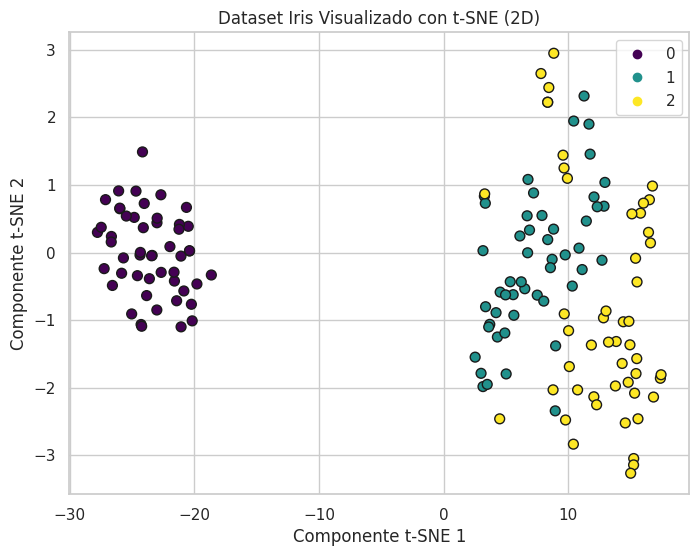

t-SNE a menudo separa mejor los clusters para visualización que PCA, pero las distancias relativas entre clusters no son significativas.


In [ ]:
# Graficar los resultados de t-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_iris, cmap='viridis', edgecolor='k', s=50)
plt.title('Dataset Iris Visualizado con t-SNE (2D)')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

# Fix: Use legend_elements() directly or ensure handles and labels are compatible
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)  # Pass handles and labels to legend

plt.grid(True)
plt.show()
print("t-SNE a menudo separa mejor los clusters para visualización que PCA, pero las distancias relativas entre clusters no son significativas.")

## 4. Ejercicio Práctico: Clustering Aplicado a Acciones

**Consigna:**
1.  Importar datos de Acciones Globales (archivo `df_stocks_reduce (1).csv`).
2.  Identificar qué algoritmo de clustering aplicaría en este caso para identificar qué acciones serían similares: No Jerárquico (K-means), Jerárquico (Aglomerativo), Densidad (DBSCAN). Justificar.
3.  Aplicar la alternativa elegida y establecer conclusiones.

---

### Paso 1: Cargar los Datos

Cargaremos el dataset proporcionado en un DataFrame de Pandas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cargar el DataFrame
df_stocks = pd.read_csv("/content/drive/MyDrive/Data Science 1 curso/Clase 8/df_stocks_reduce (1).csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_stocks.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2025-05-02 00:00:00-04:00,7.000000,7.025000,6.810000,6.820000,9150276.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2025-05-02 00:00:00-04:00,98.400002,99.879997,98.300003,98.800003,29879800.0,0.0,0.0,amd,AMD,technology,usa,NaN
2,2025-05-02 00:00:00-04:00,2.450000,2.470000,2.440000,2.470000,216600.0,0.0,0.0,ubisoft,UBSFY,gaming,france,NaN
3,2025-05-02 00:00:00-04:00,71.500000,71.820000,71.099998,71.650002,12627600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,NaN
4,2025-05-02 00:00:00-04:00,1136.660034,1159.439941,1133.319946,1156.489990,3767900.0,0.0,0.0,netflix,NFLX,entertainment,usa,NaN


### Paso 2: Exploración y Preprocesamiento de Datos

Antes de aplicar clustering, necesitamos entender nuestros datos y prepararlos.
1.  **Exploración Inicial:** Ver las primeras filas, tipos de datos, estadísticas descriptivas, valores nulos.
2.  **Selección de Características:** Elegir las columnas numéricas relevantes para el clustering. Basándonos en el objetivo de encontrar acciones "similares", las características de precio (Open, High, Low, Close) y Volumen parecen las más adecuadas. Dividends, Stock Splits son mayormente cero y no aportarían mucho. `Capital Gains` está vacía.
3.  **Limpieza:** Eliminar columnas innecesarias (como `Capital Gains`) y filas con datos faltantes si las hubiera (aunque este dataset parece limpio en las columnas seleccionadas). Manejar duplicados si existen.
4.  **Escalado:** Es **fundamental** escalar las características numéricas antes de aplicar K-Means, ya que es sensible a la magnitud de los valores. Usaremos `StandardScaler` para que cada característica tenga media 0 y desviación estándar 1.

In [ ]:
# 1. Exploración Inicial
print("Información del DataFrame:")
df_stocks.info()

print("\nEstadísticas Descriptivas:")
print(df_stocks.describe())

print("\nValores Nulos por Columna:")
print(df_stocks.isnull().sum())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6104 non-null   object 
 1   Open           6104 non-null   float64
 2   High           6104 non-null   float64
 3   Low            6104 non-null   float64
 4   Close          6104 non-null   float64
 5   Volume         6104 non-null   float64
 6   Dividends      6104 non-null   float64
 7   Stock Splits   6104 non-null   float64
 8   Brand_Name     6104 non-null   object 
 9   Ticker         6104 non-null   object 
 10  Industry_Tag   6104 non-null   object 
 11  Country        6104 non-null   object 
 12  Capital Gains  0 non-null      float64
dtypes: float64(8), object(5)
memory usage: 620.1+ KB

Estadísticas Descriptivas:
              Open         High          Low        Close        Volume  \
count  6104.000000  6104.000000  6104.000000  610

In [ ]:
# 2. Selección de Características y Limpieza
# Eliminar la columna 'Capital Gains' que está vacía
df_stocks_cleaned = df_stocks.drop(columns=['Capital Gains'])

In [ ]:
# Seleccionar características numéricas relevantes para clustering
# Nos centraremos en Open, High, Low, Close, Volume para este ejercicio
features_to_cluster = ['Open', 'High', 'Low', 'Close', 'Volume']
df_cluster_data = df_stocks_cleaned[features_to_cluster].copy()

In [ ]:
# Verificar si hay nulos en las columnas seleccionadas (parece que no, pero es buena práctica)
print(f"\nNulos en columnas seleccionadas:\n{df_cluster_data.isnull().sum()}")
df_cluster_data.dropna(inplace=True) # Eliminar filas con nulos si las hubiera


Nulos en columnas seleccionadas:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
# Revisar duplicados (basado en Ticker y Date, ya que puede haber múltiples entradas por día/ticker)
# Nota: El dataset parece tener duplicados intencionales o por error de entrada.
# Para un análisis real, investigaríamos esto a fondo. Para este ejercicio, los eliminaremos
# basándonos en Ticker y las características de clustering para simplificar.
print(f"\nFilas antes de eliminar duplicados: {len(df_stocks_cleaned)}")
# Consideraremos duplicadas las filas que tengan el mismo Ticker y mismos valores OHLCV
subset_cols = ['Ticker'] + features_to_cluster
df_stocks_cleaned.drop_duplicates(subset=subset_cols, keep='first', inplace=True)
print(f"Filas después de eliminar duplicados basados en Ticker y OHLCV: {len(df_stocks_cleaned)}")


Filas antes de eliminar duplicados: 6104
Filas después de eliminar duplicados basados en Ticker y OHLCV: 6096


In [ ]:
# Volver a seleccionar los datos numéricos del dataframe limpio y sin duplicados
df_cluster_data = df_stocks_cleaned[features_to_cluster].copy()
df_analysis = df_stocks_cleaned.copy() # Guardar una copia con info categórica para análisis posterior
df_analysis.set_index('Ticker', inplace=True) # Poner Ticker como índice

In [ ]:
# 4. Escalado de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster_data)

In [ ]:
print(f"\nForma de los datos escalados para clustering: {X_scaled.shape}")
# Mostrar las primeras filas de los datos escalados (como array numpy)
print("\nPrimeras 5 filas de datos escalados:")
print(X_scaled[:5])


Forma de los datos escalados para clustering: (6096, 5)

Primeras 5 filas de datos escalados:
[[-0.86364257 -0.86378581 -0.86324973 -0.86389325 -0.14449735]
 [-0.39812695 -0.39742853 -0.39076846 -0.39584069  0.35330883]
 [-0.88681649 -0.88666296 -0.88581769 -0.88602881 -0.35903383]
 [-0.53513319 -0.53835777 -0.53123728 -0.53399711 -0.06099165]
 [ 4.88990657  4.92413202  4.95437881  4.98635647 -0.27375165]]


### Paso 3: Selección y Justificación del Algoritmo de Clustering

**Evaluación de Opciones:**

*   **K-Means:**
    *   *Pros:* Simple, rápido, escalable. Bueno si esperamos clusters "esféricos" basados en magnitudes de precios y volumen.
    *   *Contras:* Necesitamos predefinir K. Sensible a la escala y outliers. La forma de los clusters de acciones puede no ser esférica.
*   **Jerárquico Aglomerativo:**
    *   *Pros:* No requiere K predefinido, el dendrograma ayuda a visualizar la estructura y elegir K.
    *   *Contras:* Computacionalmente muy costoso para datasets grandes (este dataset es pequeño, pero en general para acciones podría ser un problema). Las decisiones de fusión son irreversibles.
*   **DBSCAN:**
    *   *Pros:* No requiere K, encuentra formas arbitrarias, identifica ruido (acciones muy diferentes).
    *   *Contras:* Sensible a los parámetros `eps` y `min_samples`, difícil de tunear sin conocimiento del dominio. Puede fallar si la densidad de los clusters varía mucho.

**Justificación de la Elección:**

Para este ejercicio introductorio, **K-Means** es una excelente opción por su simplicidad y facilidad de interpretación. Nos permite demostrar el proceso completo, incluyendo la estimación de K con el método del codo. Aunque los clusters de acciones no sean perfectamente esféricos, K-Means puede agrupar acciones con magnitudes de precio y volumen similares. Usaremos el método del codo para estimar un número razonable de clusters (K).

### Paso 4: Aplicar Clustering (K-Means)

1.  Usaremos el método del codo para encontrar un valor K apropiado.
2.  Aplicaremos K-Means con el K seleccionado sobre los datos escalados.
3.  Añadiremos las etiquetas de los clusters al DataFrame original (o copia) para facilitar el análisis.

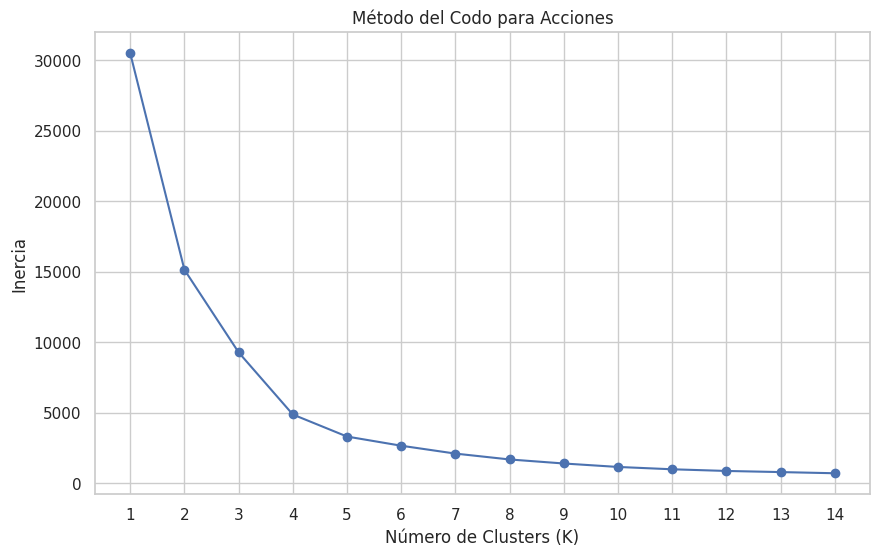

Observa el gráfico del codo. Busca el punto donde la curva empieza a aplanarse.
Un posible 'codo' podría estar alrededor de K=4, 5 o 6. Elegiremos K=5 para este ejemplo.


In [ ]:
# 1. Método del Codo para estimar K en los datos de acciones escalados
inertia_stocks = []
k_range_stocks = range(1, 15) # Probar un rango razonable de K

for k in k_range_stocks:
    kmeans_stocks = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_stocks.fit(X_scaled)
    inertia_stocks.append(kmeans_stocks.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range_stocks, inertia_stocks, marker='o')
plt.title('Método del Codo para Acciones')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(k_range_stocks)
plt.grid(True)
plt.show()

print("Observa el gráfico del codo. Busca el punto donde la curva empieza a aplanarse.")
print("Un posible 'codo' podría estar alrededor de K=4, 5 o 6. Elegiremos K=5 para este ejemplo.")
# Nota para los alumnos: La elección de K puede ser subjetiva o basarse en métricas adicionales como Silhouette Score.

In [ ]:
# 2. Aplicar K-Means con el K elegido
k_chosen = 5 # Basado en la inspección visual del codo (puede variar)
kmeans_final = KMeans(n_clusters=k_chosen, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)

# 3. Añadir las etiquetas de los clusters al DataFrame de análisis
df_analysis['Cluster'] = kmeans_final.labels_

print(f"\nSe asignaron las acciones a {k_chosen} clusters.")
df_analysis.head()


Se asignaron las acciones a 5 clusters.


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Industry_Tag,Country,Cluster
Ticker,,,,,,,,,,,,
PTON,2025-05-02 00:00:00-04:00,7.000000,7.025000,6.810000,6.820000,9150276.0,0.0,0.0,peloton,fitness,usa,0
AMD,2025-05-02 00:00:00-04:00,98.400002,99.879997,98.300003,98.800003,29879800.0,0.0,0.0,amd,technology,usa,0
UBSFY,2025-05-02 00:00:00-04:00,2.450000,2.470000,2.440000,2.470000,216600.0,0.0,0.0,ubisoft,gaming,france,0
KO,2025-05-02 00:00:00-04:00,71.500000,71.820000,71.099998,71.650002,12627600.0,0.0,0.0,the coca-cola company,food & beverage,usa,0
NFLX,2025-05-02 00:00:00-04:00,1136.660034,1159.439941,1133.319946,1156.489990,3767900.0,0.0,0.0,netflix,entertainment,usa,2


### Paso 5: Análisis y Conclusiones

Ahora que tenemos los clusters, analicemos qué características tienen y si agrupan acciones de manera significativa.

1.  **Distribución de Clusters:** Ver cuántas acciones hay en cada cluster.
2.  **Características por Cluster:** Calcular las medias de las características originales (Open, High, Low, Close, Volume) para cada cluster.
3.  **Análisis Categórico:** Ver la distribución de `Industry_Tag` y `Country` dentro de cada cluster.
4.  **Visualización (Opcional pero útil):** Reducir los datos a 2D usando PCA y graficar los puntos coloreados por cluster.

In [ ]:
# 1. Distribución de Clusters
print("Distribución de acciones por cluster:")
df_analysis['Cluster'].value_counts()

Distribución de acciones por cluster:


,count
Cluster,
0,3489
3,1652
1,634
2,202
4,119


In [ ]:
# 2. Características Medias por Cluster (usando las características originales)
print("\nCaracterísticas medias por cluster:")
# Seleccionar solo columnas numéricas originales + Cluster para el groupby
numeric_cols_orig = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Cluster']
df_analysis[numeric_cols_orig].groupby('Cluster').mean()


Características medias por cluster:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Cluster,,,,,,,
0,62.178077,63.041090,61.246783,62.171566,8.025027e+06,0.001636,0.0
1,437.805512,443.913292,431.606433,438.040299,1.153668e+07,0.008265,0.0
2,967.395125,980.990478,954.330634,968.163216,3.547285e+06,0.012178,0.0
3,223.703660,226.574491,220.355812,223.575853,1.501225e+07,0.008608,0.0
4,141.875803,146.195874,137.595882,142.330000,2.657992e+08,0.000084,0.0


In [ ]:
# 3. Análisis Categórico por Cluster
print("\nDistribución de Industrias por Cluster:")
# Usamos crosstab para ver la frecuencia de cada industria en cada cluster
pd.crosstab(df_analysis['Cluster'], df_analysis['Industry_Tag'])


Distribución de Industrias por Cluster:


Industry_Tag,apparel,automotive,aviation,consumer goods,cryptocurrency,e-commerce,entertainment,finance,financial services,fitness,...,gaming,healthcare,hospitality,logistics,luxury goods,manufacturing,music,retail,social media,technology
Cluster,,,,,,,,,,,,,,,,,,,,,
0,393,299,202,202,0,101,101,0,54,101,...,302,4,93,0,81,40,0,202,101,707
1,0,41,0,0,0,0,0,171,0,0,...,0,0,0,0,0,0,101,101,0,220
2,0,0,0,0,0,0,101,0,0,0,...,0,0,0,0,0,0,0,101,0,0
3,0,144,0,101,101,101,0,233,0,0,...,0,97,210,101,18,61,0,0,0,284
4,0,17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,102


In [ ]:
print("\nDistribución de Países por Cluster:")
pd.crosstab(df_analysis['Cluster'], df_analysis['Country'])


Distribución de Países por Cluster:


Country,canada,france,germany,japan,netherlands,switzerland,usa
Cluster,,,,,,,
0,101,182,389,201,202,101,2313
1,0,0,0,0,0,0,634
2,0,0,0,0,0,0,202
3,0,18,0,101,0,0,1533
4,0,0,0,0,0,0,119


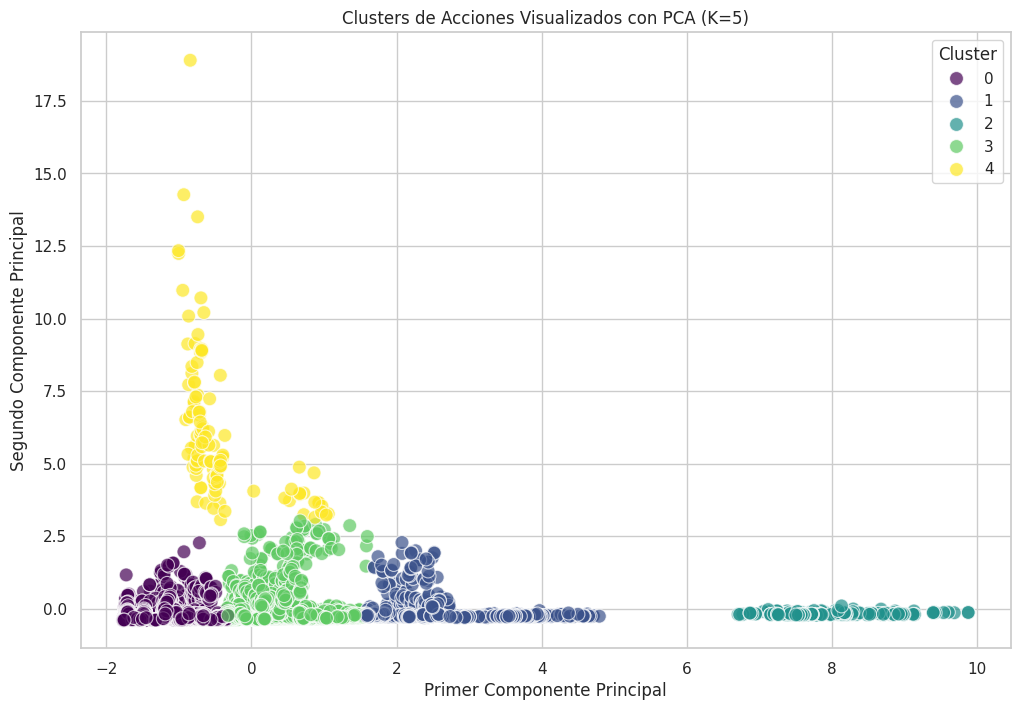

In [ ]:
# 4. Visualización con PCA
pca_stocks = PCA(n_components=2)
X_pca_stocks = pca_stocks.fit_transform(X_scaled) # Usar los datos escalados

df_analysis['PCA1'] = X_pca_stocks[:, 0]
df_analysis['PCA2'] = X_pca_stocks[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_analysis, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters de Acciones Visualizados con PCA (K=5)')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.legend(title='Cluster')
plt.grid(True)

plt.show()